In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1

# For YOLOv8

In [13]:
def calculatePercentiles(df, modelName):
    print("="*50)
    print(modelName)
    print("="*50)
    print("Max : ",df['run'].max())
    print("Min : ",df['run'].min())
    print("Median : ",df['run'].median())
    print("90th Percentile: ",df['run'].quantile(0.90))
    print("95th Percentile: ",df['run'].quantile(0.95))
    print("99th Percentile: ",df['run'].quantile(0.99))

def getModelName(folder):
    val = folder.split("_")[1]
    if val == "yolov8n":
        val = "Nano"
    elif val == "yolov8m":
        val = "Medium"
    elif val == "yolov8x":
        val = "X-Large"
    return val

filename = "resized"

df_combined=pd.DataFrame()

for device in ["AGX_outputs_yolo","Nano_outputs_yolo","NX_outputs_yolo"]:
    print("="*50)
    print("="*50)
    if device[0] == "A":
        store_device = "Orin AGX"
    elif device[0] == "N" and device[1] == "a":
        store_device = "Orin Nano"
    else:
        store_device = "Xavier NX"
    print(store_device)
    print("="*50)
    # for folder in ["new_yolov11_nano_50_epochs","new_yolov11_medium_50_epochs","new_yolov11_x_50_epochs"]:
    for folder in ["scratch_yolov8n_100_epochs","scratch_yolov8m_100_epochs","scratch_yolov8x_100_epochs"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/{device}/{folder}/output_inference_time/{filename}.csv")
        df_temp['run']*=1000
        df_temp = df_temp[df_temp['run'] <= df_temp['run'].quantile(0.99)]
        modelName = getModelName(folder)
        df_temp["model"] = modelName
        df_temp["device"] = store_device
        calculatePercentiles(df_temp, modelName)
        df_combined = pd.concat([df_combined, df_temp[["run", "model", "device"]]])


df_combined.reset_index(drop=True, inplace=True)
# print(df_combined.head(10))
# print(df_combined.tail(10))
# print("Total rows : ",len(df_combined))

Orin AGX
Nano
Max :  43.0240631103515
Min :  33.5917472839355
Median :  36.31031513214105
90th Percentile:  37.27557659149161
95th Percentile:  37.41903305053708
99th Percentile:  38.134121894836355
Medium
Max :  147.146463394165
Min :  136.570930480957
Median :  142.31610298156733
90th Percentile:  144.49059963226316
95th Percentile:  145.02768516540525
99th Percentile:  146.0616755485534
X-Large
Max :  313.2562637329101
Min :  295.8412170410156
Median :  308.7592124938965
90th Percentile:  310.8342170715332
95th Percentile:  311.779773235321
99th Percentile:  313.0759668350219
Orin Nano
Nano
Max :  51.9244670867919
Min :  45.1970100402832
Median :  49.16608333587645
90th Percentile:  49.9448776245117
95th Percentile:  50.144100189208956
99th Percentile:  50.83979845046993
Medium
Max :  167.5121784210205
Min :  158.6921215057373
Median :  163.5921001434326
90th Percentile:  165.22326469421387
95th Percentile:  165.776515007019
99th Percentile:  166.57447576522821
X-Large
Max :  429.08

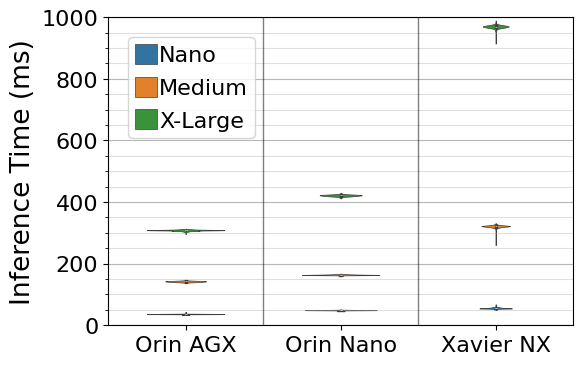

In [15]:
font_size = 16
# Create the violin plot
plt.figure(figsize=(6, 4))  # Reduce width of figure to make x-ticks closer

# Define custom x-tick positions:
custom_xticks = [0, 0.6, 1.2]  # Adjusted spacing (AGX ↔ Nano wider, Nano ↔ NX closer)
device_mapping = {'Orin AGX': custom_xticks[0], 'Orin Nano': custom_xticks[1], 'Xavier NX': custom_xticks[2]}

# Map categorical device names to numerical x positions
df_combined['device_numeric'] = df_combined['device'].map(device_mapping)

ax = sns.violinplot(
    x='device', 
    y='run', 
    hue='model', 
    data=df_combined, 
    inner='box', 
    width=0.5,  # Reduce violin width for tighter spacing
    linewidth=0.5,
    dodge=False,  
    cut=0  # Avoids extending violins beyond data range
)

# Add a legend
plt.legend(loc="upper left", fontsize=16, ncol = 1, borderpad=0.3,
           handletextpad=0.1, borderaxespad=0.9, columnspacing=0.5)

# Set title and labels
plt.ylabel("Inference Time (ms)", fontsize=19)
plt.xlabel("", fontsize=font_size)

# Customize Y-axis
plt.ylim(0, 1000)  
ax.set_yticks(np.arange(0, 1200, 200))
ax.tick_params(axis='x', which='minor', bottom=False)
ax.yaxis.set_tick_params(labelsize=font_size)
ax.xaxis.set_tick_params(labelsize=font_size)

# Add grid
ax.grid(which='minor', axis='y', linestyle='-', alpha=0.4)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.9)
plt.minorticks_on()

# # Reduce X-tick spacing by manually setting positions
xticks = ax.get_xticks()
# xticks = [0, 0.8, 1.6]  # Manually set positions
# plt.xticks(xticks, ax.get_xticklabels(), rotation=0, ha="center")

# 🔹 Add vertical lines between categories
for i in range(len(xticks) - 1):
    midpoint = (xticks[i] + xticks[i + 1]) / 2
    ax.axvline(midpoint, color='black', linestyle='-', alpha=0.5, linewidth=1)

# Adjust spacing to make it tighter
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
# plt.margins(0.005)

# Save and show plot
# plt.tight_layout()
out_path = "/home/drone/Downloads/IPDPS/final_outputs/yolo_plots/"
outfile = out_path + "custom_trained_violin_yolov8_all_100_epochs.png"
plt.savefig(outfile, bbox_inches='tight')
plt.savefig(outfile.replace(".png", ".pdf"), format='pdf', bbox_inches='tight', dpi=700)

plt.show()

# For YOLOv11

In [ ]:
def calculatePercentiles(df, modelName):
    print("="*50)
    print(modelName)
    print("="*50)
    print("Max : ",df['run'].max())
    print("Min : ",df['run'].min())
    print("Median : ",df['run'].median())
    print("90th Percentile: ",df['run'].quantile(0.90))
    print("95th Percentile: ",df['run'].quantile(0.95))
    print("99th Percentile: ",df['run'].quantile(0.99))

def getModelName(folder):
    val = folder.split("_")[1]
    if val == "yolov11n":
        val = "Nano"
    elif val == "yolov11m":
        val = "Medium"
    elif val == "yolov11x":
        val = "X-Large"
    return val

filename = "resized"

df_combined=pd.DataFrame()

for device in ["AGX_outputs_yolo","Nano_outputs_yolo","NX_outputs_yolo"]:
    print("="*50)
    print("="*50)
    if device[0] == "A":
        store_device = "Orin AGX"
    elif device[0] == "N" and device[1] == "a":
        store_device = "Orin Nano"
    else:
        store_device = "Xavier NX"
    print(store_device)
    print("="*50)
    # for folder in ["new_yolov11_nano_50_epochs","new_yolov11_medium_50_epochs","new_yolov11_x_50_epochs"]:
    for folder in ["scratch_yolov11n_100_epochs","scratch_yolov11m_100_epochs","scratch_yolov11x_100_epochs"]:
        df_temp = pd.read_csv(f"/home/drone/Downloads/IPDPS/final_outputs/{device}/{folder}/output_inference_time/{filename}.csv")
        df_temp['run']*=1000
        df_temp = df_temp[df_temp['run'] <= df_temp['run'].quantile(0.99)]
        modelName = getModelName(folder)
        df_temp["model"] = modelName
        df_temp["device"] = store_device
        calculatePercentiles(df_temp, modelName)
        df_combined = pd.concat([df_combined, df_temp[["run", "model", "device"]]])


df_combined.reset_index(drop=True, inplace=True)
# print(df_combined.head(10))
# print(df_combined.tail(10))
# print("Total rows : ",len(df_combined))

Orin AGX
Nano
Max :  45.0930595397949
Min :  36.718606948852496
Median :  39.13342952728265
90th Percentile:  39.396405220031646
95th Percentile:  39.50089216232292
99th Percentile:  41.820197105407715
Medium
Max :  136.277437210083
Min :  125.4324913024902
Median :  132.4155330657959
90th Percentile:  134.453272819519
95th Percentile:  135.08193492889401
99th Percentile:  136.0433840751647
X-Large
Max :  314.0850067138672
Min :  302.3393154144287
Median :  308.9625835418701
90th Percentile:  310.8846187591553
95th Percentile:  311.68079376220703
99th Percentile:  313.5451960563659
Orin Nano
Nano
Max :  54.6851158142089
Min :  47.9712486267089
Median :  51.8219470977783
90th Percentile:  52.69720554351801
95th Percentile:  53.06935310363765
99th Percentile:  54.20811176300044
Medium
Max :  178.7121295928955
Min :  170.4695224761963
Median :  175.70674419403076
90th Percentile:  177.17866897583002
95th Percentile:  177.71810293197632
99th Percentile:  178.49585294723508
X-Large
Max :  4

In [9]:
print(df_combined)

             run    model     device
0      40.363550     Nano   Orin AGX
1      38.688421     Nano   Orin AGX
2      38.918972     Nano   Orin AGX
3      38.928032     Nano   Orin AGX
4      45.093060     Nano   Orin AGX
...          ...      ...        ...
8905  899.358034  X-Large  Xavier NX
8906  908.177376  X-Large  Xavier NX
8907  905.744553  X-Large  Xavier NX
8908  903.400660  X-Large  Xavier NX
8909  897.846937  X-Large  Xavier NX

[8910 rows x 3 columns]


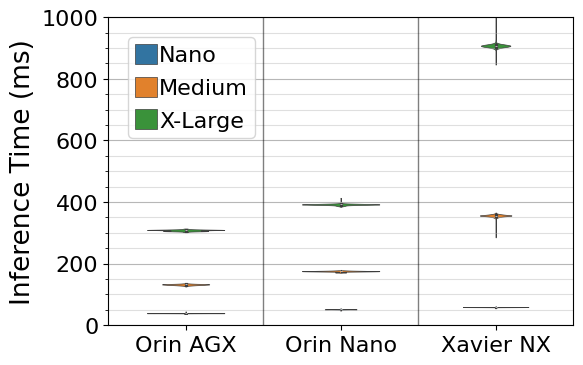

In [12]:
font_size = 16
# Create the violin plot
plt.figure(figsize=(6, 4))  # Reduce width of figure to make x-ticks closer

# Define custom x-tick positions:
custom_xticks = [0, 0.6, 1.2]  # Adjusted spacing (AGX ↔ Nano wider, Nano ↔ NX closer)
device_mapping = {'Orin AGX': custom_xticks[0], 'Orin Nano': custom_xticks[1], 'Xavier NX': custom_xticks[2]}

# Map categorical device names to numerical x positions
df_combined['device_numeric'] = df_combined['device'].map(device_mapping)

ax = sns.violinplot(
    x='device', 
    y='run', 
    hue='model', 
    data=df_combined, 
    inner='box', 
    width=0.5,  # Reduce violin width for tighter spacing
    linewidth=0.5,
    dodge=False,  
    cut=0  # Avoids extending violins beyond data range
)

# Add a legend
plt.legend(loc="upper left", fontsize=16, ncol = 1, borderpad=0.3,
           handletextpad=0.1, borderaxespad=0.9, columnspacing=0.5)

# Set title and labels
plt.ylabel("Inference Time (ms)", fontsize=19)
plt.xlabel("", fontsize=font_size)

# Customize Y-axis
plt.ylim(0, 1000)  
ax.set_yticks(np.arange(0, 1200, 200))
ax.tick_params(axis='x', which='minor', bottom=False)
ax.yaxis.set_tick_params(labelsize=font_size)
ax.xaxis.set_tick_params(labelsize=font_size)

# Add grid
ax.grid(which='minor', axis='y', linestyle='-', alpha=0.4)
ax.grid(which='major', axis='y', linestyle='-', alpha=0.9)
plt.minorticks_on()

# # Reduce X-tick spacing by manually setting positions
xticks = ax.get_xticks()
# xticks = [0, 0.8, 1.6]  # Manually set positions
# plt.xticks(xticks, ax.get_xticklabels(), rotation=0, ha="center")

# 🔹 Add vertical lines between categories
for i in range(len(xticks) - 1):
    midpoint = (xticks[i] + xticks[i + 1]) / 2
    ax.axvline(midpoint, color='black', linestyle='-', alpha=0.5, linewidth=1)

# Adjust spacing to make it tighter
# plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
# plt.margins(0.005)

# Save and show plot
# plt.tight_layout()
out_path = "/home/drone/Downloads/IPDPS/final_outputs/yolo_plots/"
outfile = out_path + "custom_trained_violin_yolov11_all_100_epochs.png"
plt.savefig(outfile, bbox_inches='tight')
plt.savefig(outfile.replace(".png", ".pdf"), format='pdf', bbox_inches='tight', dpi=700)

plt.show()